# Single predictor models
Single predictor models investigating the effect of a range of lower- and higher-level visual and auditory predictors.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.create import create_single_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_contrast,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid, plot_individual_analyses)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

/home/alejandro/anaconda3/lib/python3.7/site-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


## Define predictors and confounds

In [3]:
predictors = ['speech', 'rms', 'text',
              'brightness', 'shot_change', 
              'any_faces', 
              'hand', 'action', 'landscape', 'building', 'indoors', 'city', 
              'animal', 'music', 'vehicle', 'water', 'wood', 'tool', 
              'people']

In [4]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [5]:
#single_models = create_single_models(predictors, confounds)

In [6]:
filename = Path('models') / 'single_predictor.json'

In [7]:
# dump_collection(single_models, filename)

In [8]:
single_models = load_collection(filename)

In [9]:
# Single predictor models with all runs/tasks in the same model
nnd_single_combined_path = Path('models') / 'single_predictor_nnd_comined.json'
# dump_collection(single_models_nnd_combined, nnd_single_combined_path)
single_models_nnd_combined = load_collection(nnd_single_combined_path)

## Generate reports

In [14]:
for (pred, dataset, task), model in flatten_collection(nnd_single_models):
    model.generate_report(run_id=model.runs[0])

## Inspect regressors

In [ ]:
df = _extract_regressors(single_models)

In [ ]:
plot_regressor_distribution(df=df, split_by='hue', color=None, aspect=3, hist=None, rug=True)

In [ ]:
plot_regressor_timeseries(df=df, split_by='row', height=1.2, aspect=10)

In [ ]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

In [ ]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [114]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if dataset == 'NaturalisticNeuroimagingDatabase':
        if model.get_status()['status'] == 'DRAFT':
            model.private = False
            model.push()
            model.compile()
        else:
            print(f'{pred} {model.status} for {dataset}')

action PASSED for NaturalisticNeuroimagingDatabase
action PASSED for NaturalisticNeuroimagingDatabase
action PASSED for NaturalisticNeuroimagingDatabase
action PASSED for NaturalisticNeuroimagingDatabase
action PASSED for NaturalisticNeuroimagingDatabase
action PASSED for NaturalisticNeuroimagingDatabase
action PASSED for NaturalisticNeuroimagingDatabase
action PASSED for NaturalisticNeuroimagingDatabase
action PASSED for NaturalisticNeuroimagingDatabase
action PASSED for NaturalisticNeuroimagingDatabase
animal PASSED for NaturalisticNeuroimagingDatabase
animal PASSED for NaturalisticNeuroimagingDatabase
animal PASSED for NaturalisticNeuroimagingDatabase
animal PASSED for NaturalisticNeuroimagingDatabase
animal PASSED for NaturalisticNeuroimagingDatabase
animal PASSED for NaturalisticNeuroimagingDatabase
animal PASSED for NaturalisticNeuroimagingDatabase
animal PASSED for NaturalisticNeuroimagingDatabase
animal PASSED for NaturalisticNeuroimagingDatabase
animal PASSED for NaturalisticN

## NND Combined Results

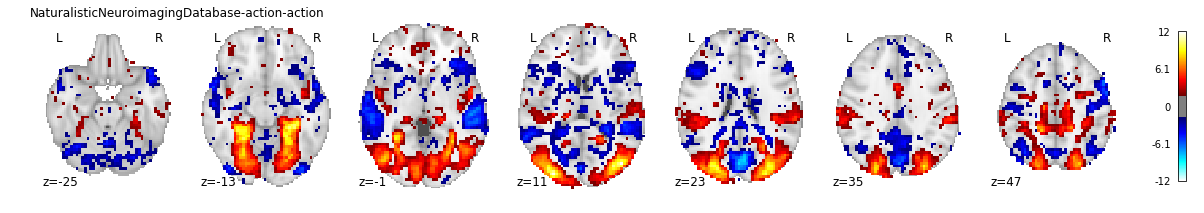

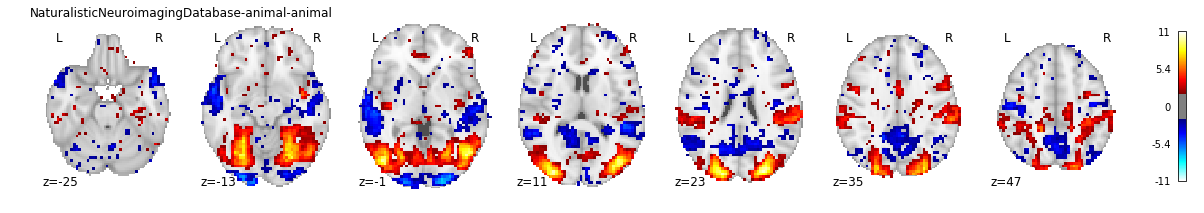

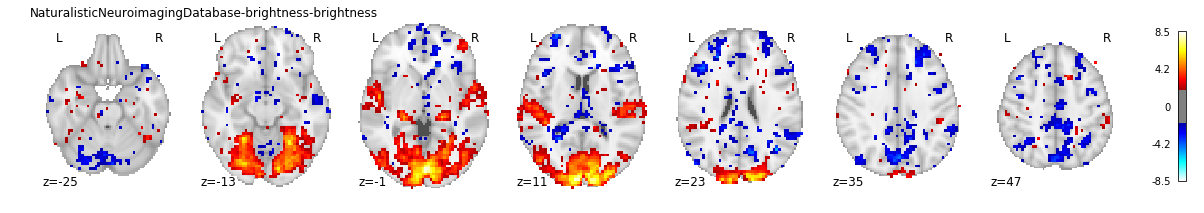

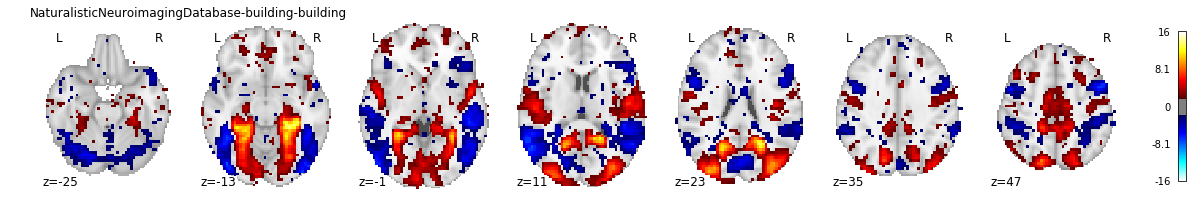

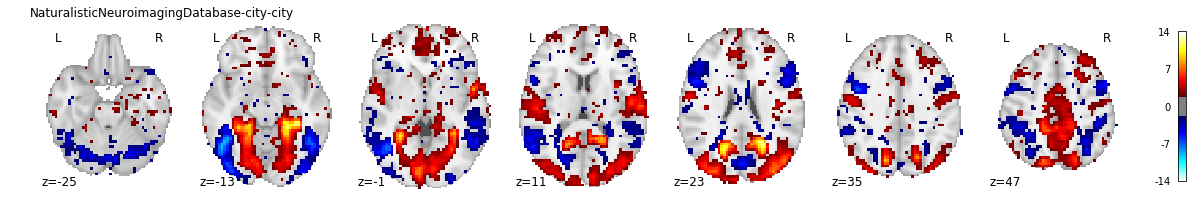

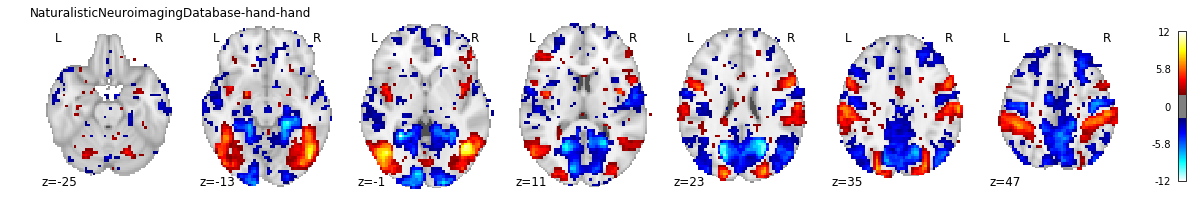

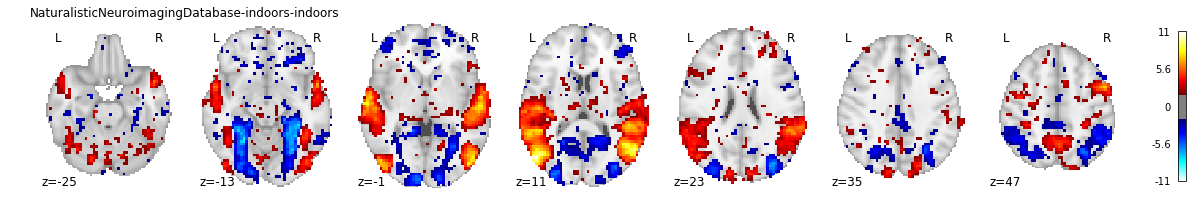

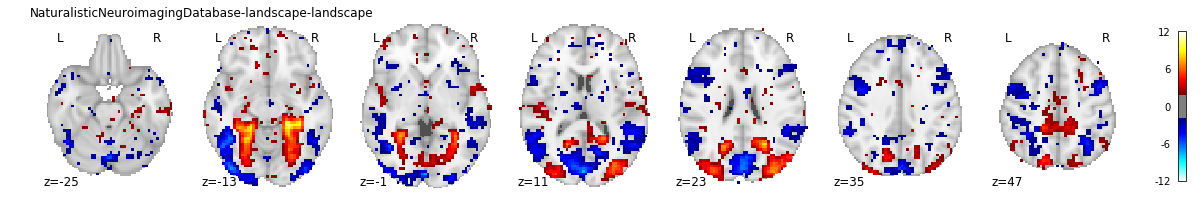

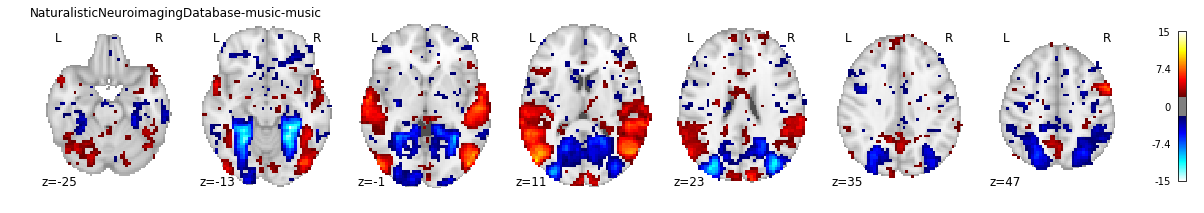

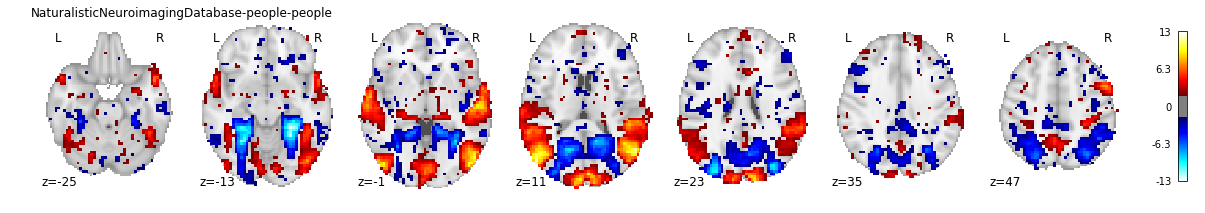

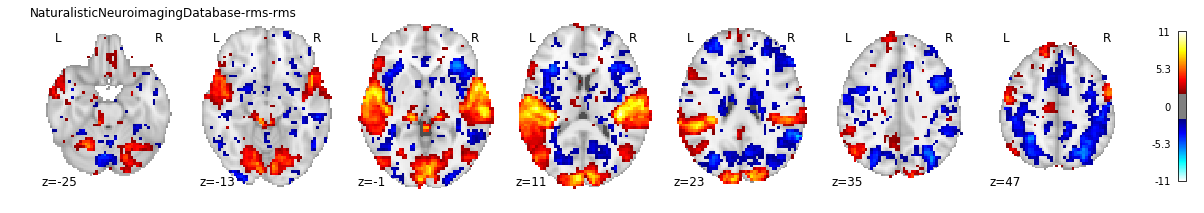

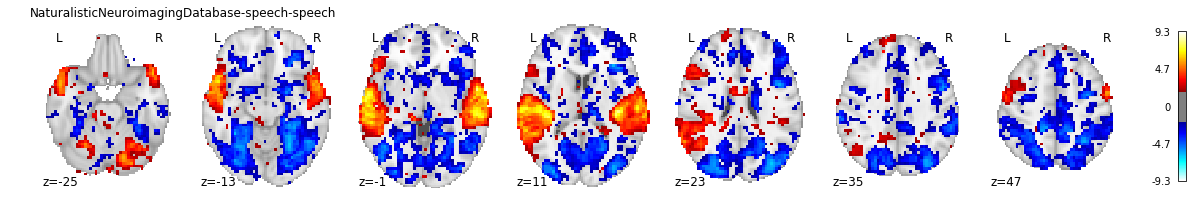

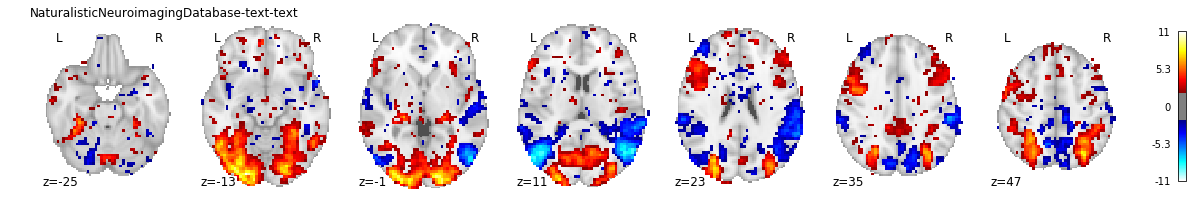

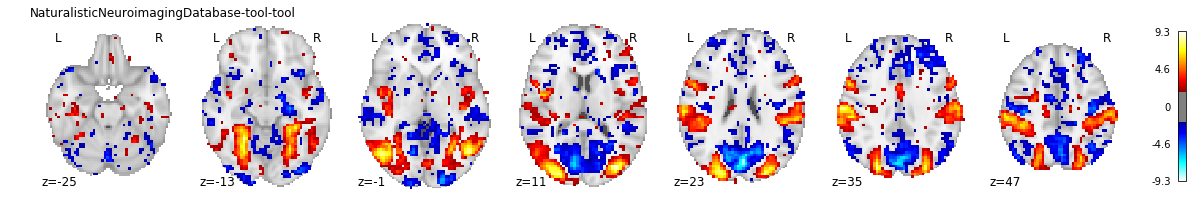

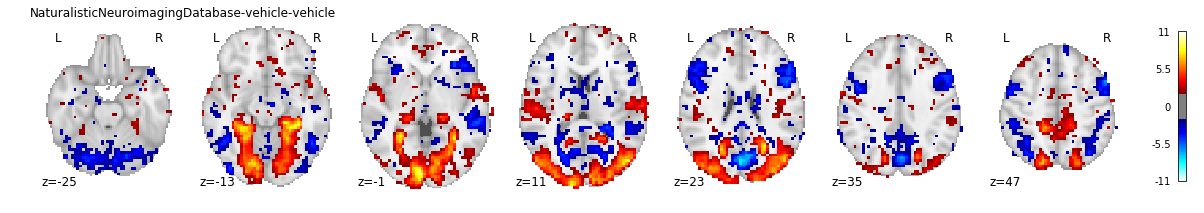

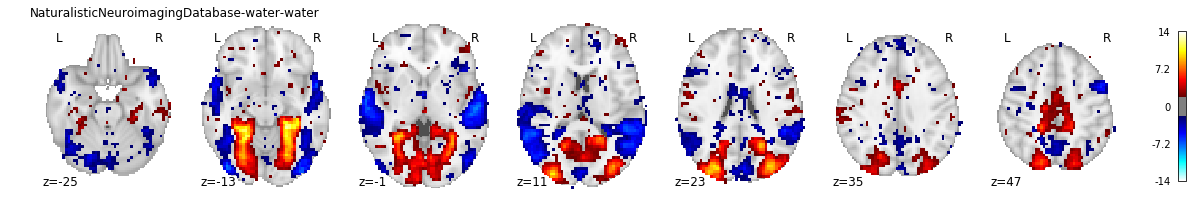

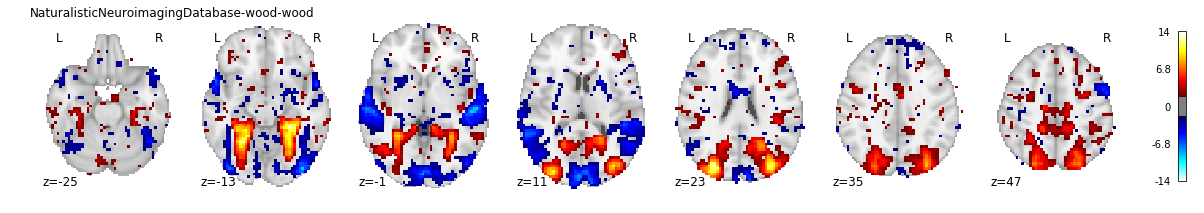

In [19]:
flat_models = flatten_collection(single_models_nnd_combined)
for (contrast, _), an in flat_models:
    plot_contrast(contrast, an)